In [1]:
from keras.models import Sequential  # 采用贯序模型
from keras.layers import Input, Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.callbacks import *
from keras.datasets import mnist
import numpy as np
from keras import metrics
from sklearn.externals import joblib
import pickle
import os
from keras.utils import to_categorical
import struct
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
def save_variable(v,filename):
    f=open(filename,'wb')
    pickle.dump(v,f)
    f.close()
    return filename

def load_variavle(filename):
    f=open(filename,'rb')
    r=pickle.load(f)
    f.close()
    return r

In [3]:
def load_data(path='../data/mnist.npz'):
    f = np.load(path)
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']
    f.close()
    return (x_train, y_train), (x_test, y_test)

In [4]:
def top_1_acc(y_true, y_pred):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=1)
def top_3_acc(y_true, y_pred):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=3)
def top_5_acc(y_true, y_pred):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=5)

In [5]:
tBatchSize = 128
'''第一步：选择模型'''
model = Sequential() # 采用贯序模型
 
'''第二步：构建网络层'''
'''构建网络只是构建了一个网络结构，并定义网络的参数，此时还没有输入的数据集'''
#构建的第一个层作为输入层
# Dense 这是第一个隐藏层，并附带定义了输入层，该隐含层有500个神经元。输入则是 784个节点
model.add(Dense(500,input_shape=(784,))) # 输入层，28*28=784 输入层将二维矩阵换成了一维向量输入
model.add(Activation('tanh')) # 激活函数是tanh 为双曲正切  tanh(x) = sinh(x)/cosh(x) = (e^x - e^(-x))/(e^x + e^(-x))
model.add(Dropout(0.5)) # 采用50%的dropout  随机取一半进行训练
 
#构建的第2个层作为隐藏层2， （如果加上输入层，实际上是第三层）
model.add(Dense(500)) # 隐藏层节点500个
model.add(Activation('tanh'))
model.add(Dropout(0.5))
 
model.add(Dense(500)) # 隐藏层3，节点500个
model.add(Activation('tanh'))
#model.add(Dropout(0.5))
 
#构建的第3个层作为输出层
model.add(Dense(10)) # 输出结果是10个类别，所以维度是10
# softmax介绍可以参考https://blog.csdn.net/haolexiao/article/details/72757796
model.add(Activation('softmax')) # 最后一层用softmax作为激活函数
 
'''第三步：网络优化和编译'''
#   lr：大于0的浮点数，学习率
#   momentum：大于0的浮点数，动量参数
#   decay：大于0的浮点数，每次更新后的学习率衰减值
#   nesterov：布尔值，确定是否使用Nesterov动量
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) # 优化函数，设定学习率（lr）等参数
 
# 只有通过了编译，model才真正的建立起来，这时候才能够被使用
#model.compile(loss='categorical_crossentropy', optimizer=sgd, class_mode='categorical') # 使用交叉熵作为loss函数 这是原例子，但是执行出错


In [6]:
# 数据集获取 mnist 数据集的介绍可以参考 
(X_train, y_train), (X_test, y_test) = load_data() # 使用Keras自带的mnist工具读取数据（第一次需要联网）
 
# 由于mist的输入数据维度是(num, 28, 28)，这里需要把后面的维度直接拼起来变成784维
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
 
#这个能生成一个OneHot的10维向量，作为Y_train的一行，这样Y_train就有60000行OneHot作为输出
Y_train = (np.arange(10) == y_train[:, None]).astype(int)  # 整理输出
Y_test = (np.arange(10) == y_test[:, None]).astype(int) 

In [7]:
# model.load_weights('../model/model.m')

In [8]:
if not os.path.exists('../model/model.m'):
    batch_size = 256
    epochs = 35
    model.compile(loss='categorical_crossentropy', metrics=[top_1_acc, top_3_acc,top_5_acc],
              optimizer=sgd) # 使用交叉熵作为loss函数   
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    checkpoint = ModelCheckpoint('../model/model.m', monitor='val_loss', verbose=1, save_best_only=True, mode='min', save_weights_only=True)
    history = model.fit(X_train, Y_train,
             batch_size=batch_size,
             validation_data = (X_test, Y_test),
             epochs=epochs,
             callbacks=[early_stopping,checkpoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/35
60000/60000 [==============================] - 1s 18us/step - loss: 1.0190 - top_1_acc: 0.6544 - top_3_acc: 0.8831 - top_5_acc: 0.9517 - val_loss: 0.4927 - val_top_1_acc: 0.8534 - val_top_3_acc: 0.9686 - val_top_5_acc: 0.9902
Epoch 2/35
60000/60000 [==============================] - 1s 11us/step - loss: 0.8162 - top_1_acc: 0.7283 - top_3_acc: 0.9304 - top_5_acc: 0.9776 - val_loss: 0.4238 - val_top_1_acc: 0.8764 - val_top_3_acc: 0.9743 - val_top_5_acc: 0.9912
Epoch 3/35
60000/60000 [==============================] - 1s 10us/step - loss: 0.7403 - top_1_acc: 0.7570 - top_3_acc: 0.9406 - top_5_acc: 0.9819 - val_loss: 0.4032 - val_top_1_acc: 0.8859 - val_top_3_acc: 0.9749 - val_top_5_acc: 0.9927
Epoch 4/35
60000/60000 [==============================] - 1s 11us/step - loss: 0.6805 - top_1_acc: 0.7762 - top_3_acc: 0.9500 - top_5_acc: 0.9847 - val_loss: 0.3744 - val_top_1_acc: 0.8865 - val_top_3_acc: 0.9794 - val_top_5_acc: 0.9933
Ep

60000/60000 [==============================] - 1s 10us/step - loss: 0.4085 - top_1_acc: 0.8680 - top_3_acc: 0.9770 - top_5_acc: 0.9939 - val_loss: 0.2210 - val_top_1_acc: 0.9315 - val_top_3_acc: 0.9885 - val_top_5_acc: 0.9978
Epoch 20/35
60000/60000 [==============================] - 1s 10us/step - loss: 0.3829 - top_1_acc: 0.8771 - top_3_acc: 0.9785 - top_5_acc: 0.9944 - val_loss: 0.2315 - val_top_1_acc: 0.9267 - val_top_3_acc: 0.9888 - val_top_5_acc: 0.9976
Epoch 21/35
60000/60000 [==============================] - 1s 10us/step - loss: 0.3850 - top_1_acc: 0.8763 - top_3_acc: 0.9779 - top_5_acc: 0.9940 - val_loss: 0.2324 - val_top_1_acc: 0.9291 - val_top_3_acc: 0.9896 - val_top_5_acc: 0.9977
Epoch 22/35
60000/60000 [==============================] - 1s 11us/step - loss: 0.3844 - top_1_acc: 0.8764 - top_3_acc: 0.9784 - top_5_acc: 0.9943 - val_loss: 0.2194 - val_top_1_acc: 0.9307 - val_top_3_acc: 0.9889 - val_top_5_acc: 0.9980
Epoch 23/35
60000/60000 [==============================] - 1

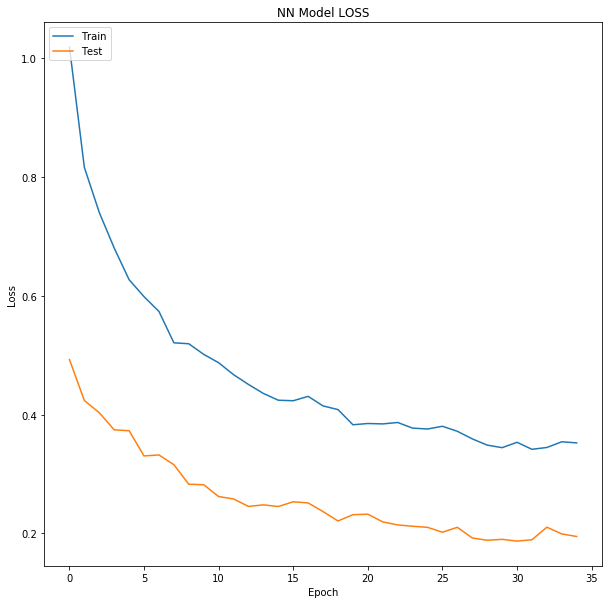

In [9]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('NN Model LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
his_res_ke = history.history.keys()
his_res_va = list(history.history.values())

In [11]:
loss_me = dict()
for i,j in zip(his_res_ke,his_res_va):
    loss_me[i] = j

In [12]:
col_1 = [i for i in his_res_ke if '1' in i]
col_3 = [i for i in his_res_ke if '3' in i]
col_5 = [i for i in his_res_ke if '5' in i]

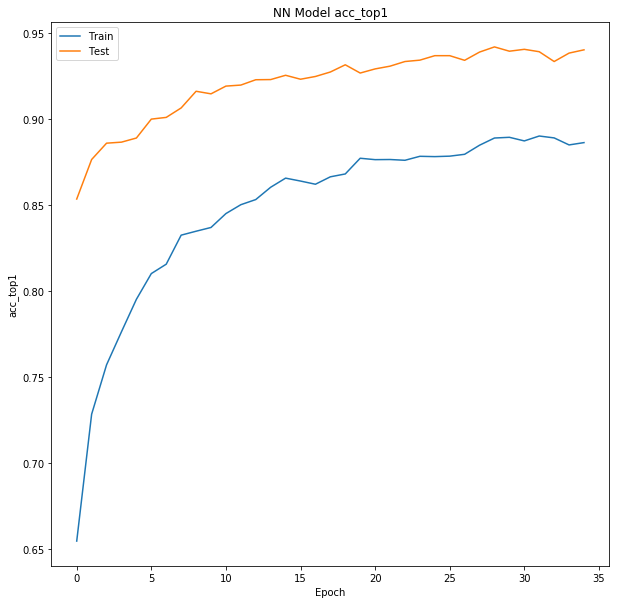

In [13]:
plt.figure(figsize=(10,10))
plt.plot(loss_me[col_1[0]])
plt.plot(loss_me[col_1[1]])
plt.legend(['Train', 'Test'], loc='upper left')
plt.title('NN Model acc_top1')
plt.ylabel('acc_top1')
plt.xlabel('Epoch')
plt.show()

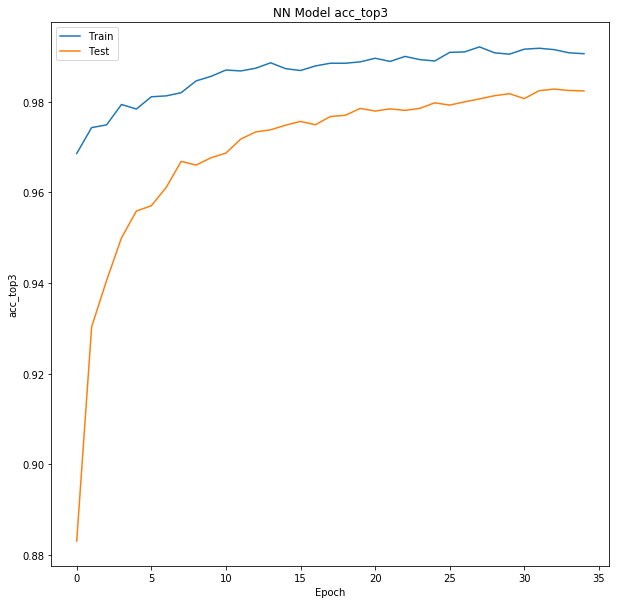

In [14]:
plt.figure(figsize=(10,10))
plt.plot(loss_me[col_3[0]])
plt.plot(loss_me[col_3[1]])
plt.legend(['Train', 'Test'], loc='upper left')
plt.title('NN Model acc_top3')
plt.ylabel('acc_top3')
plt.xlabel('Epoch')
plt.show()

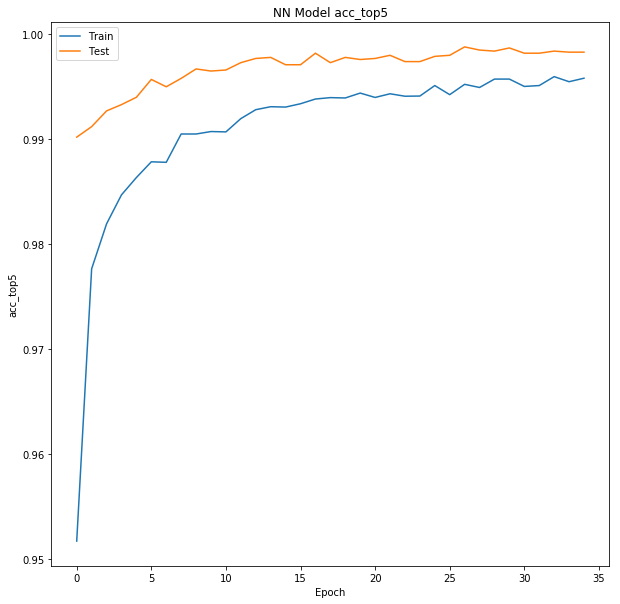

In [15]:
plt.figure(figsize=(10,10))
plt.plot(loss_me[col_5[0]])
plt.plot(loss_me[col_5[1]])
plt.legend(['Train', 'Test'], loc='upper left')
plt.title('NN Model acc_top5')
plt.ylabel('acc_top5')
plt.xlabel('Epoch')
plt.show()